<a href="https://colab.research.google.com/github/ADC1811/CODSOFT/blob/main/Task3_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing important Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Loading and exploring the Dataset**

In [8]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Preprocessing Process on the Dataset**

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Performing Exploratory Data Analysis(EDA) on the Dataset**

<Axes: >

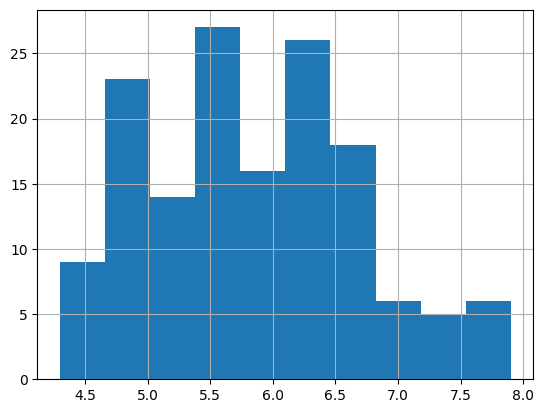

In [16]:
df['sepal_length'].hist()

<Axes: >

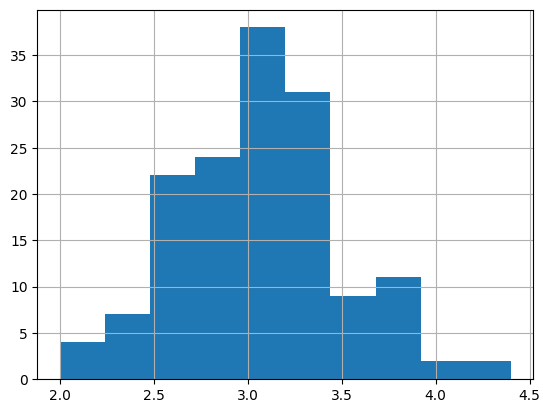

In [17]:
df['sepal_width'].hist()

<Axes: >

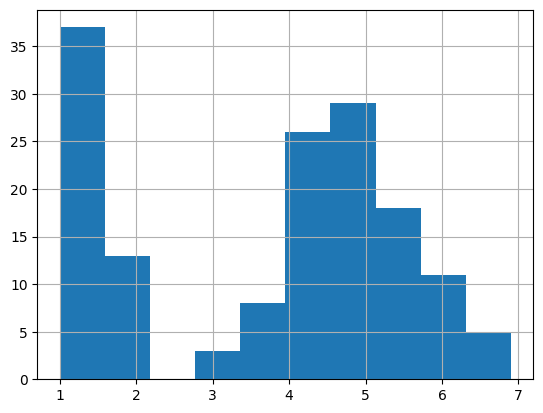

In [18]:
df['petal_length'].hist()

<Axes: >

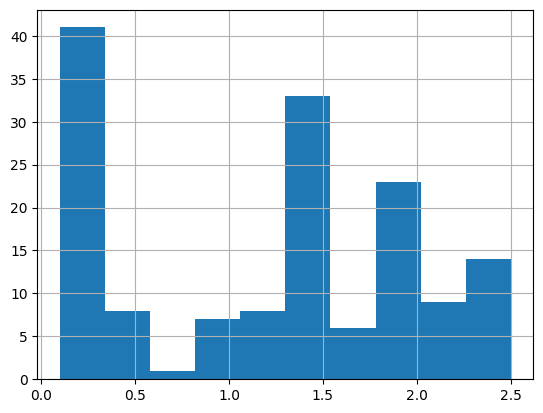

In [19]:
df['petal_width'].hist()

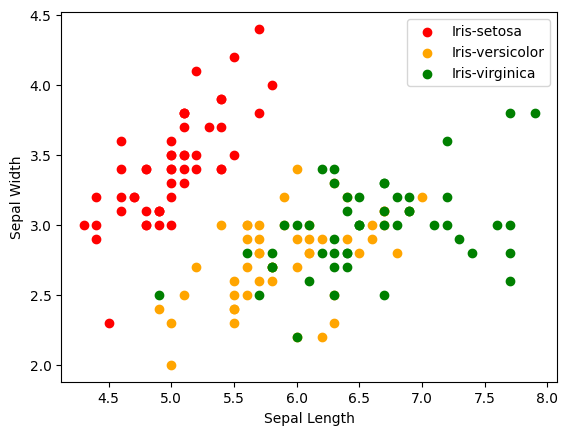

In [21]:
colors=['red','orange','green']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x=df[df['species']==Species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

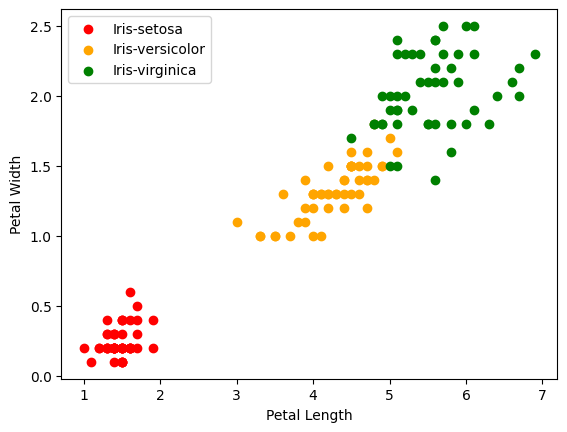

In [22]:
colors=['red','orange','green']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x=df[df['species']==Species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

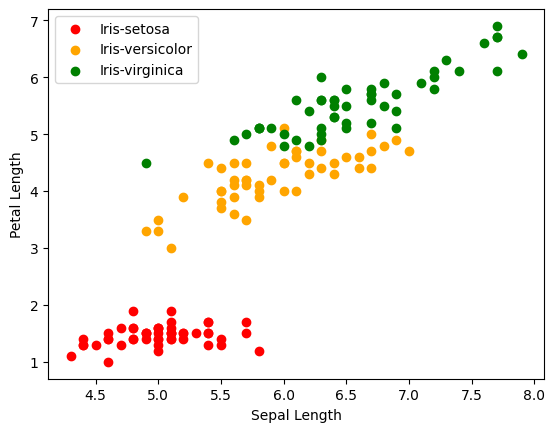

In [25]:
colors=['red','orange','green']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x=df[df['species']==Species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

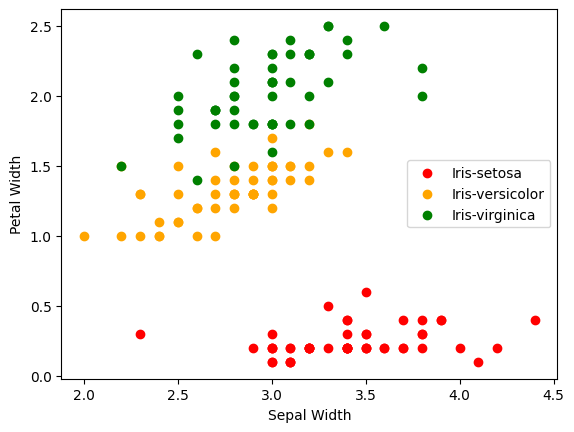

In [26]:
colors=['red','orange','green']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x=df[df['species']==Species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [27]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-32-7d5e1dcf4a03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


<Axes: >

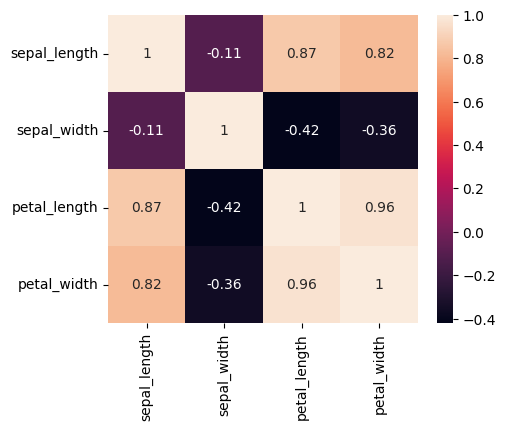

In [32]:
c=df.corr()
f,a=plt.subplots(figsize=(5,4))
sns.heatmap(c,annot=True,ax=a)

In [33]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['species']=l.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Training the Model using Decision Trees, Logistic Regression, Random Forest Classifier and K-nearest Neighbours**

In [61]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy using Decision Tree: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy using Decision Tree: 97.78
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [63]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [64]:
from sklearn.metrics import accuracy_score, classification_report
# Predict the species for the test set
y_pred = lr.predict(x_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy using Logistic Regression: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy using Logistic Regression: 97.78
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict the species for the test set
y_pred = knn.predict(x_test)

# Calculate accuracy and print it in percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 97.78%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test)

# Calculate accuracy and print classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print(f"Accuracy using Random Forests: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

Accuracy using Random Forests: 97.78
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

